In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import display
import sys
import os
import logging
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.insert(0,'../src')
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

logger = logging.getLogger("feat_viz")
logging.basicConfig(format='[%(name)s %(levelname)s] %(message)s', level=logging.INFO)

In [2]:
dat_dir = "/share/PI/sabatti/sc_data/intestine2k"
raw_dat = pd.read_table(os.path.join(dat_dir, "table_B_scRNAseq_UMI_counts.tsv"), delimiter="\t")
raw_dat = raw_dat.set_index("gene").T # load the gene expression
print(raw_dat.shape)
raw_dat.head()

(1383, 27998)


gene,Xkr4,Gm1992,Gm37381,Rp1,Rp1.1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,PISD,DHRSX,Vmn2r122,CAAA01147332.1
AAACGGGTCACTGGGC,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
AAAGATGGTTCGGGCT,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
AAAGCAACATGGTCAT,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,1,2,0,0
AAAGTAGGTTGTGGAG,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
AACCGCGCAAGCGTAG,0,0,0,0,0,0,0,2,1,0,...,0,0,0,0,0,0,1,0,0,0


In [3]:
cell_df = pd.read_table(os.path.join(dat_dir, "table_C_scRNAseq_tsne_coordinates_zones.tsv"), delimiter="\t")
cell_df = cell_df.set_index("cell_id")
expr_df = cell_df.join(raw_dat, how="left")
expr_df.head()

,tSNE_coordinate_1,tSNE_coordinate_2,zone,Xkr4,Gm1992,Gm37381,Rp1,Rp1.1,Sox17,Gm37323,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,PISD,DHRSX,Vmn2r122,CAAA01147332.1
cell_id,,,,,,,,,,,,,,,,,,,,,
AAACCTGGTAAGTTCC,12.518369,-16.735935,V3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
AAACGGGCACCAACCG,-3.619842,-5.642620,V5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGGGTCACTGGGC,13.622892,16.828087,V1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
AAAGATGGTGGACGAT,15.653014,3.311508,V2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAGATGGTTCGGGCT,6.754220,20.791256,V1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


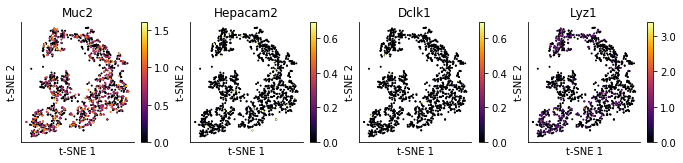

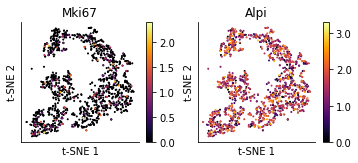

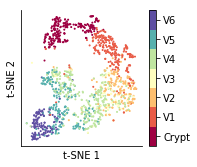

In [6]:
from plot_utils import plot_scatter_continuous, plot_scatter_discrete

def adjust_xy_labels(ax, xy_labels=("t-SNE 1", "t-SNE 2")):
    ax.set_xlabel(xy_labels[0])
    ax.set_ylabel(xy_labels[1])
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

def plot_multi_gene_scatter(gene_df, proj):
    genes = list(gene_df.columns)
    # logger.info("Plotting genes: {}".format(genes))
    fig, axes = plt.subplots(1, len(genes), figsize=(2.9*len(genes), 2.2))
    for i_gene, gene in enumerate(genes):
        ax = axes[i_gene]
        vals = gene_df[gene]
        plot_scatter_continuous(proj, vals, ax, ms=1)
        ax.set_title(gene)
        adjust_xy_labels(ax)
    plt.show()
    
cell_t_genes = ["Muc2", "Hepacam2", "Dclk1", "Lyz1"]
proj = cell_df[["tSNE_coordinate_1", "tSNE_coordinate_2"]]
plot_multi_gene_scatter(expr_df[cell_t_genes], proj)

plot_multi_gene_scatter(expr_df[["Mki67", "Alpi"]], proj)
# plot discrete zonation labels
fig, ax = plt.subplots(1, 1, figsize=(2.7, 2.5))
plot_scatter_discrete(proj, cell_df["zone"], ax, ms=1)
adjust_xy_labels(ax)
plt.show()
# summarize_gene_exprs(cell_df, raw_dat)

In [3]:
import scanpy.api as sc
from anndata import AnnData, read_h5ad

def get_ann_data(dat, verbose = True):
    adata = AnnData(dat.T.values)
    adata.obs_names = np.array(dat.columns)
    adata.var_names = np.array(dat.index)
    # adata.raw.obs_names = adata.obs_names
    # adata.raw.var_names = adata.var_names
    adata.var['gene_ids'] = dat.index
    adata.var_names_make_unique()
    if verbose:
        sc.pl.highest_expr_genes(adata, n_top=10)

    # filter out zero genes
    sc.pp.filter_cells(adata, min_genes=200)
    adata.raw = adata.copy()
    sc.pp.filter_genes(adata, min_cells=10)
    adata.obs['n_counts'] = adata.X.sum(axis=1)
    if verbose:
        sc.pl.violin(adata, ['n_genes', 'n_counts'], jitter=0.4, multi_panel=True)
        nz_genes = len(adata.var['gene_ids'])
        print("Filtered out: {} genes; remaining {}".format(len(dat.index) - nz_genes, nz_genes))
    return adata

# filter cells with too many counts (potential doublets)
# cell_sel = adata.obs['n_genes'] < 5000
# adata = adata[cell_sel, :]
# if verbose:
#     print("Filtered out: {} doublet cells".format(np.sum(np.logical_not(cell_sel))))
#     print(adata)